In [1]:
! pip install spacy
! pip install wordcloud

In [2]:
# Step 1: Import Required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import string
import re

In [38]:
# Step 2: Load the dataset 
df = pd.read_csv("Twitter_Data.csv")
df.rename(columns={'clean_text': 'Tweet', 'category': 'Sentiment'}, inplace=True)
df.head()

,Tweet,Sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [39]:
df.isna().sum()

Tweet        4
Sentiment    7
dtype: int64

In [40]:
df.shape

(162980, 2)

In [41]:
df = df.dropna()

In [42]:
df.isna().sum()

Tweet        0
Sentiment    0
dtype: int64

In [43]:
## CREATING A NEW DATASETS

In [44]:
df.Sentiment.value_counts()

Sentiment
Positive    72249
Neutral     55211
Negative    35509
Name: count, dtype: int64

In [45]:
df_positive = df[df.Sentiment == 'Positive'].iloc[:2000]
df_neutral = df[df.Sentiment == 'Neutral'].iloc[:2000]
df_negative = df[df.Sentiment == 'Negative'].iloc[:2000]

In [46]:
df2 = pd.concat([df_positive, df_neutral, df_negative], axis = 0)

In [47]:
df2.shape

(6000, 2)

In [48]:
df2.Sentiment.value_counts()

Sentiment
Positive    2000
Neutral     2000
Negative    2000
Name: count, dtype: int64

In [49]:
df2.head()

,Tweet,Sentiment
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
8,with upcoming election india saga going import...,Positive
9,gandhi was gay does modi,Positive


In [50]:
# Step 3: Load Spacy Model 
nlp = spacy.load("en_core_web_sm")

In [51]:
# Step 4: TEXT PREPROCESSING 

In [52]:
## Perfrom Lemmatization 
def lemmatization(text):
    doc = nlp(text)
    lemmalist = [word.lemma_ for word in doc]
    return ' '.join(lemmalist)

In [53]:
# Apply lemmatization on the Tweet Column
df2['lemma'] = df2['Tweet'].apply(lemmatization)

In [54]:
df2.head()

,Tweet,Sentiment,lemma
2,what did just say vote for modi welcome bjp t...,Positive,what do just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,Positive,ask his supporter prefix chowkidar their name ...
4,answer who among these the most powerful world...,Positive,answer who among these the most powerful world...
8,with upcoming election india saga going import...,Positive,with upcoming election india saga go important...
9,gandhi was gay does modi,Positive,gandhi be gay do modi


In [55]:
## Remove the all stop word from Tweet
def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
    return ' '.join(no_stopwords) 
df2["Final"] = df2["lemma"].apply(remove_stopwords)

In [56]:
df2.head()

,Tweet,Sentiment,lemma,Final
2,what did just say vote for modi welcome bjp t...,Positive,what do just say vote for modi welcome bjp t...,vote modi welcome bjp tell rahul main campa...
3,asking his supporters prefix chowkidar their n...,Positive,ask his supporter prefix chowkidar their name ...,ask supporter prefix chowkidar modi great serv...
4,answer who among these the most powerful world...,Positive,answer who among these the most powerful world...,answer powerful world leader today trump putin...
8,with upcoming election india saga going import...,Positive,with upcoming election india saga go important...,upcoming election india saga important pair lo...
9,gandhi was gay does modi,Positive,gandhi be gay do modi,gandhi gay modi


In [57]:
df2.drop(columns = ['Tweet', 'lemma'], inplace = True)

In [72]:
df2.head()

,Sentiment,Final
2,Positive,vote modi welcome bjp tell rahul main campa...
3,Positive,ask supporter prefix chowkidar modi great serv...
4,Positive,answer powerful world leader today trump putin...
8,Positive,upcoming election india saga important pair lo...
9,Positive,gandhi gay modi


In [74]:
df2.isna().sum()

Sentiment    0
Final        0
dtype: int64

In [96]:
# DIVIDING THE DATASETS
X = df2.drop(columns = ['Sentiment'])
y = df2["Sentiment"]

In [97]:
# Step 6: Convert text into numerical features using TF-IDF
tfidf = TfidfVectorizer()

In [98]:
tfidf.fit(X['Final'])

TfidfVectorizer()

In [99]:
tfidf_matrix = tfidf.transform(X["Final"]).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
vectorizer_df2 = pd.DataFrame(tfidf_matrix, columns = tfidf.get_feature_names_out())

In [102]:
vectorizer_df2.head()

,224,225positive9,22neutral,235positive9,23bocz,23may,23neutral24neutralnda,23rd,243,243positive9,...,रबदतरभ,शबच,सदछ,सबक,सरक,२०१४,२०१९,চৰক,ತಮಭ,ರತಕ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X.drop(columns = ["Final"], inplace = True)

In [106]:
X.shape, vectorizer_df.shape

((6000, 0), (6000, 12293))

In [108]:
X = pd.concat([X, vectorizer_df], axis = 1)

In [109]:
X.head()

,224,225positive9,22neutral,235positive9,23bocz,23may,23neutral24neutralnda,23rd,243,243positive9,...,रबदतरभ,शबच,सदछ,सबक,सरक,२०१४,२०१९,চৰক,ತಮಭ,ರತಕ
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
X.isna().sum()

224             657
225positive9    657
22neutral       657
235positive9    657
23bocz          657
               ... 
२०१४            657
२०१९            657
চৰক             657
ತಮಭ             657
ರತಕ             657
Length: 12293, dtype: int64

In [112]:
X = X.fillna(0)
X.isna().sum()

224             0
225positive9    0
22neutral       0
235positive9    0
23bocz          0
               ..
२०१४            0
२०१९            0
চৰক             0
ತಮಭ             0
ರತಕ             0
Length: 12293, dtype: int64

In [116]:
X = X.iloc[:6000]
X.shape, y.shape

((6000, 12293), (6000,))

In [118]:
# Step 6: Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((4800, 12293), (1200,))

In [119]:
# Step 7: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)  

LogisticRegression()

In [126]:
# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)
y_test[:5]

4163    Positive
5350     Neutral
518     Positive
367      Neutral
5525    Negative
Name: Sentiment, dtype: object

In [127]:
y_pred[:5]

array(['Positive', 'Negative', 'Negative', 'Neutral', 'Negative'],
      dtype=object)

In [128]:
# Step 9: Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.4475

Classification Report:
               precision    recall  f1-score   support

    Negative       0.46      0.59      0.52       383
     Neutral       0.42      0.41      0.41       380
    Positive       0.47      0.35      0.40       437

    accuracy                           0.45      1200
   macro avg       0.45      0.45      0.44      1200
weighted avg       0.45      0.45      0.44      1200



Text(0.5, 1.0, 'CONFUSION MATRIX FOR SENTIMENTAL ANALYSIS')

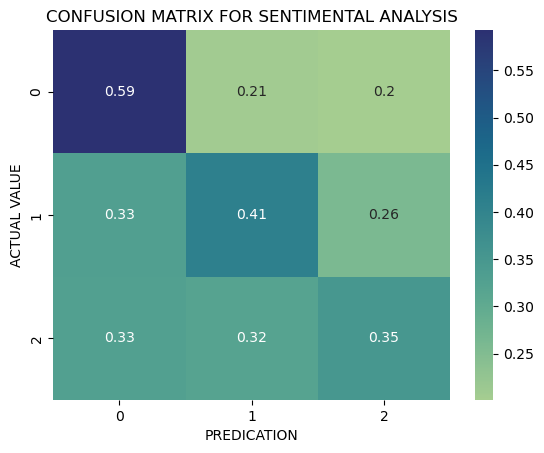

In [129]:
cf = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cf,annot = True, cmap = 'crest');
plt.xlabel("PREDICATION");
plt.ylabel("ACTUAL VALUE");
plt.title("CONFUSION MATRIX FOR SENTIMENTAL ANALYSIS")